<h2>Econdb - The Database of Economic Indicators</h2>

Econdb https://www.econdb.com/ sisältää paljon talouteen liittyviä aikasarjoja. Sieltä voi hakea aikasarjan tickerin perusteella tai käyttämällä valmista Econdb:n antamaa Python komentoa.

Seuraavassa tarvitaan pandas-datareader -kirjastoa, joka ei kuulu Anacondan vakioasennukseen. Voit asentaa sen esimerkiksi seuraavasti:
<ul>
    <li>Käynnistä Anaconda Navigator ja valitse <b>Environments</b></li>
    <li>Jos <b>pandas-datareader</b> ei ole <b>Installed</b>-listassa, niin siirry <b>Not installed</b> -listaan</li>
    <li>Jos <b>pandas-datareader</b> ei löydy tästäkään listasta, niin päivitä lista (<b>Update index</b>)</li>
    <li>Valitse <b>pandas-datareader</b> ja napsauta alareunasta <b>Apply</b> ja seuraa asennuksen vaiheita.</li>
</ul>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
%matplotlib inline

<h3>Haku tickerin perusteella</h3>

In [2]:
# Suomen bruttokansantuotteen reaaliarvot
df1 = web.DataReader('ticker=RGDPFI', 'econdb')

# Ruotsin bruttokansantuotteen reaaliarvot
df2 = web.DataReader('ticker=RGDPSE', 'econdb')

# Yhdistetään datat ja muutetaan arvot muutosprosenteiksi
df3 = pd.concat([df1.pct_change(), df2.pct_change()], axis = 1)
df3.columns = ['Finland', 'Sweden']
df3

,Finland,Sweden
TIME_PERIOD,,
2016-10-01,NaN,NaN
2017-01-01,0.011645,0.004475
2017-04-01,0.010230,0.012138
2017-07-01,0.003768,0.011095
2017-10-01,0.008007,0.001485
2018-01-01,0.000953,0.002666
2018-04-01,0.000053,0.008790
2018-07-01,-0.000864,-0.003977
2018-10-01,0.001641,0.013490


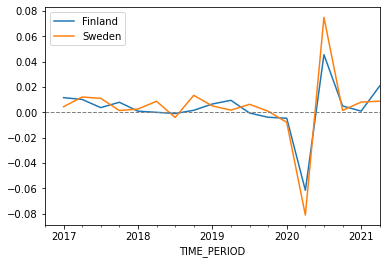

In [3]:
df3.plot()
plt.axhline(y=0, color = 'gray', linewidth = 1, linestyle = '--')

In [4]:
df3.corr()

,Finland,Sweden
Finland,1.000000,0.946967
Sweden,0.946967,1.000000


<h3>Haku Econdb:stä kopioidulla komennolla</h3>

In [5]:
# Seuraava koodi kopioitu Econdb:stä
df = web.DataReader('dataset=NAMQ_10_GDP&v=Geopolitical entity (reporting)&h=TIME&from=2017-08-01&GEO=\
    [AL,AT,BE,BA,BG,HR,CY,CZ,DK,EE,EA19,FI,FR,DE,EL,HU,IS,IE,IT,XK,LV,LT,LU,MT,ME,NL,MK,NO,PL,PT,RO,RS,SK,SI,ES,SE,CH,TR,UK]\
    &NA_ITEM=[B1GQ]&S_ADJ=[SCA]&UNIT=[CLV10_MNAC]', 'econdb')
df

Frequency                                                                                 Quarterly  \
Unit of measure                     Chain linked volumes (2010), million units of national currency   
Seasonal adjustment                                           Seasonally and calendar adjusted data   
National accounts indicator (ESA10)                         Gross domestic product at market prices   
Geopolitical entity (reporting)                                                             Austria   
TIME_PERIOD                                                                                           
2017-10-01                                                                       82123                
2018-01-01                                                                       83077                
2018-04-01                                                                       83441                
2018-07-01                                                                       83630                
2018-10-01                                                                       84341                
2019-01-01                                                                       85016                
2019-04-01                                                                       84746                
2019-07-01                                                                       85008                
2019-10-01                                                                       84552                
2020-01-01                                                                       82691                
2020-04-01                                                                       73687                
2020-07-01                                                                       81790                
2020-10-01                                                                       79725                
2021-01-01                                                                       79582                
2021-04-01                                                                       82457                

Frequency                                                                     \
Unit of measure                                                                
Seasonal adjustment                                                            
National accounts indicator (ESA10)                                            
Geopolitical entity (reporting)     Belgium Bulgaria Croatia Cyprus  Czechia   
TIME_PERIOD                                                                    
2017-10-01                           100277    22026   88221   5078  1191472   
2018-01-01                           100692    22155   88247   5179  1197312   
2018-04-01                           101165    22362   89768   5244  1206109   
2018-07-01                           101515    22596   90220   5271  1213483   
2018-10-01                           102405    22792   90655   5293  1221954   
2019-01-01                           102597    23078   91684   5369  1232838   
2019-04-01                           102928    23214   91953   5398  1242528   
2019-07-01                           103444    23346   92628   5402  1249343   
2019-10-01                           104051    23496   93081   5464  1257203   
2020-01-01                           100568    23600   92362   5429  1214806   
2020-04-01                            88568    21224   78571   4717  1106569   
2020-07-01                            98998    22133   83243   5159  1181291   
2020-10-01                            98932    22610   86693   5224  1189999   
2021-01-01                           100034    23178   91416   5312  1184968   
2021-04-01                           101745    23327   91242   5324  1197106   

Frequency                                                            ...  \
Unit of measure                                                      ...   
Sea

In [6]:
# Näytetään kaikki sarakkeet
pd.set_option('max_columns', None)
# Sarakkeiden monitasoisen hierarkisen indeksin voi poistaa:
df.columns = df.columns.droplevel([0, 1, 2, 3])
df

Geopolitical entity (reporting),Austria,Belgium,Bulgaria,Croatia,Cyprus,Czechia,Denmark,Estonia,Finland,France,Germany,Hungary,Ireland,Italy,Latvia,Lithuania,Luxembourg,Malta,Netherlands,Norway,Euro area (19 countries),Poland,Greece,Portugal,Romania,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Turkey
TIME_PERIOD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-10-01,82123,100277,22026,88221,5078,1191472,515784,4803,50615,549646,741570,8252594,69466,404314,5718,9162,12528.0,2602,176538,732586,2625098,461608,46241,45955,173412,905925,20649,10295,287064,1051858,180604,467628
2018-01-01,83077,100692,22155,88247,5179,1197312,518425,4854,50663,549756,738363,8407417,69351,404354,5776,9244,12715.0,2604,177243,735950,2626832,467487,46593,46296,174327,925536,20798,10316,288642,1054662,182547,474496
2018-04-01,83441,101165,22362,89768,5244,1206109,521031,4891,50666,551744,742476,8497641,71799,404285,5879,9357,12621.0,2694,178352,737151,2640100,473424,46690,46679,177131,935523,21024,10443,290144,1063932,184228,477616
2018-07-01,83630,101515,22596,90220,5271,1213483,524168,4926,50622,554144,739339,8595753,70690,404573,5960,9398,12719.0,2768,178864,742203,2642048,480299,46733,46923,179174,938123,21224,10567,291916,1059701,183867,469841
2018-10-01,84341,102405,22792,90655,5293,1221954,526786,4991,50705,557810,742197,8693508,72201,405458,6011,9536,12766.0,2775,179729,743308,2656287,484361,46995,47118,180304,940879,21330,10710,293534,1073997,184214,454881
2019-01-01,85016,102597,23078,91684,5369,1232838,530596,5072,51042,561429,750021,8847434,72946,405639,5984,9655,12758.0,2774,180827,742214,2674025,493441,47448,47494,183103,948765,21513,10764,295067,1079468,184704,463528
2019-04-01,84746,102928,23214,91953,5398,1242528,533147,5102,51528,564344,746327,8911417,74990,405938,6024,9745,13018.0,2855,181581,743059,2679028,496508,47744,47792,184871,962946,21592,10731,296182,1081417,185437,474560
2019-07-01,85008,103444,23346,92628,5402,1249343,535236,5133,51502,565258,749394,8976457,74680,406705,6051,9837,13105.0,2896,182243,742756,2686430,502422,47465,48020,185364,984013,21642,10877,297230,1088306,186501,474800
2019-10-01,84552,104051,23496,93081,5464,1257203,535637,5141,51305,563100,748836,9045453,75924,404989,6048,9929,13111.0,2943,183162,756073,2686081,503844,47445,48366,186667,1003168,21749,11028,298463,1089330,187363,481280


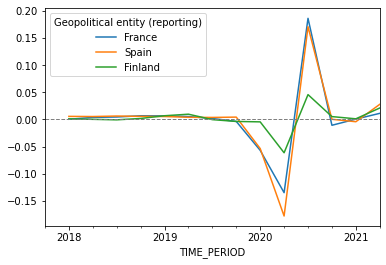

In [7]:
df[['France', 'Spain', 'Finland']].pct_change().plot()
plt.axhline(y=0, color = 'gray', linewidth = 1, linestyle = '--')